In [3]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

train = np.loadtxt('/media/ivan/778B482205074FE31/data/mnist/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('/media/ivan/778B482205074FE31/data/mnist/test.csv', delimiter=',', skiprows=1)

In [4]:
train_data = train[:, 1:] #данные в исходном длинно-строчном формате

In [5]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [67]:
#объект рса, 100 компонентов 
pca = PCA(n_components=100)

In [68]:
#обрабатываем обучающие данные
pca.fit(train_data)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [69]:
#преобразуем через рса обучающие данные
train_pca = pca.transform(train_data)

In [70]:
#преобразуем через рса тестовые-проверочные данные
test_pca = pca.transform(test)

In [71]:
#метки объектов в отдельный массив
train_label = train[:, 0]

In [72]:
#разбивка обучающих данных для кросс-валидационной оценки качества
y_train, y_val, x_train, x_val = train_test_split(
    train_label, train_pca, test_size=0.2, random_state=42)

In [73]:
#берем самый простой алгоритм по ближ.соседу
knn = KNeighborsClassifier(n_neighbors=4)

In [74]:
#обучаем алгоритм
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [75]:
#оцениваем качество на встроенной оценке
print("Правильность на тестовом наборе для nn: {:.2f}".format(knn.score(x_val, y_val)))

Правильность на тестовом наборе для 1-nn: 0.97


In [76]:
#второй вариант оценки качества
pred_val = knn.predict(x_val)

In [77]:
#оцениваем 
print('Accuracy: %s' % accuracy_score(y_val, pred_val))

Accuracy: 0.970952380952


In [78]:
#предсказываем тестовые данные
pred_test = knn.predict(test_pca)

In [80]:
#файл сабмита
with open('submit04.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%s\n' % (i, int(p)))

In [81]:
#данные для примера визуализации
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

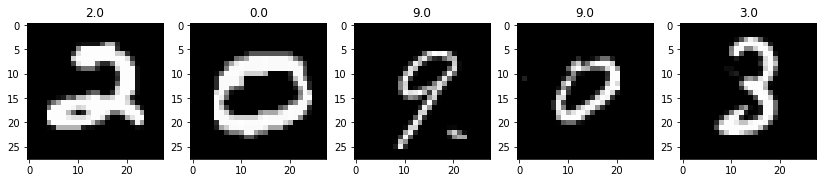

In [82]:
#визуализируем первые пять предсказаний
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % pred_test[i - 1]);

оценка на конкурсе: 0.97